In [1]:
%load_ext autoreload

In [39]:
%autoreload 2
import matplotlib
from matplotlib.gridspec import GridSpec
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import _init_paths
from block_gen import block_gen as bg
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d import axes3d, Axes3D #<-- Note the capitalization!

This shows simulated label corruption.


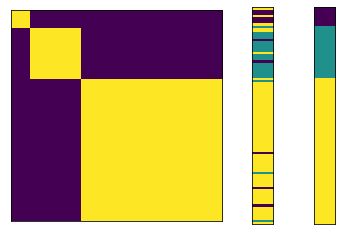

In [32]:
grid,l,gt = bg.generate_blockgrid(100,3,random=False,
                               bg_grid_noise=0.05,
                               label_noise=0.25)
fig,axs = bg.plot_blockgrid(grid,l,gt)
print("This shows simulated label corruption.")

This shows simulated label corruption.


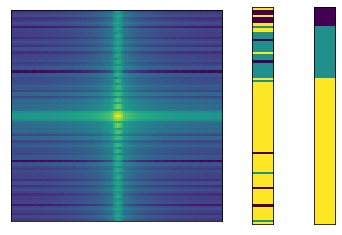

In [33]:
fgrid = bg.grid_fft(grid)
sd_grid = bg.spec_density(fgrid)
fig,axs = bg.plot_blockgrid(sd_grid,l,gt)
print("This shows simulated label corruption.")

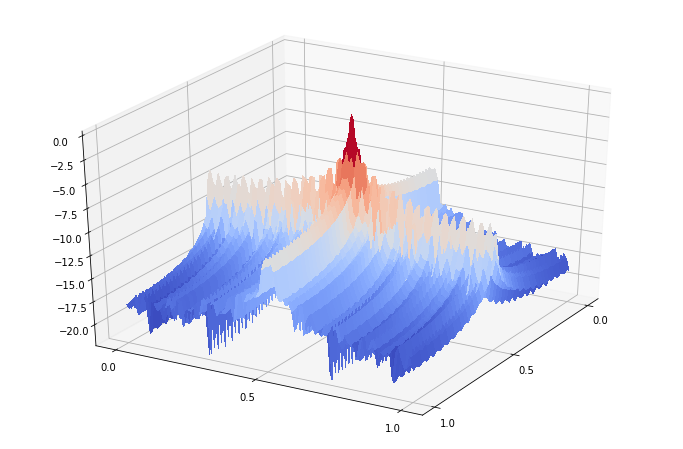

In [34]:
fig,ax = bg.grid_plot_3d(sd_grid,angle_view=(30,30))

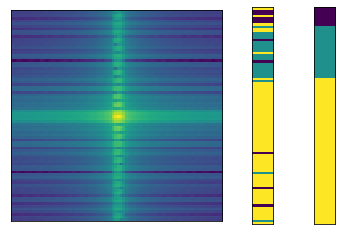

In [35]:
lpg1 = bg.lp_filter(fgrid,10)
sd_grid = bg.spec_density(lpg1)
fig,axs = bg.plot_blockgrid(sd_grid,l,gt)

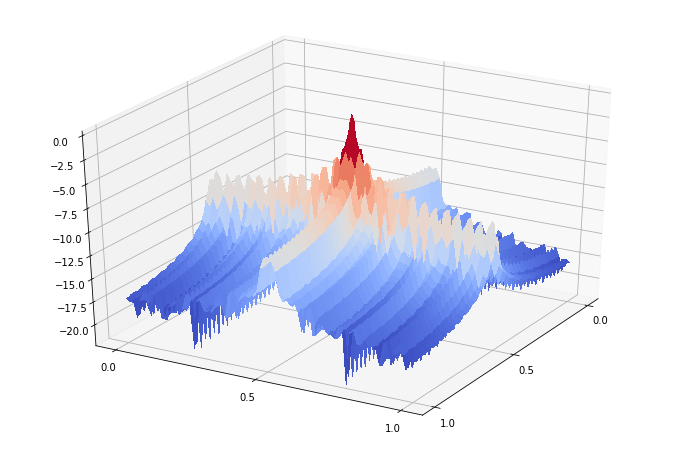

In [36]:
fig,ax = bg.grid_plot_3d(sd_grid,angle_view=(30,30))

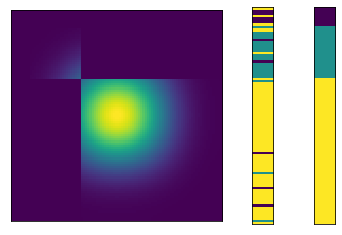

In [37]:
igrid = np.fft.ifft2(fgrid)
rigrid = np.abs( (igrid * igrid.T)/len(igrid) )
fig,axs = bg.plot_blockgrid(rigrid,l,gt)

# Summary

Text(0.5, 1.0, 'Reconstructed Block Grid')

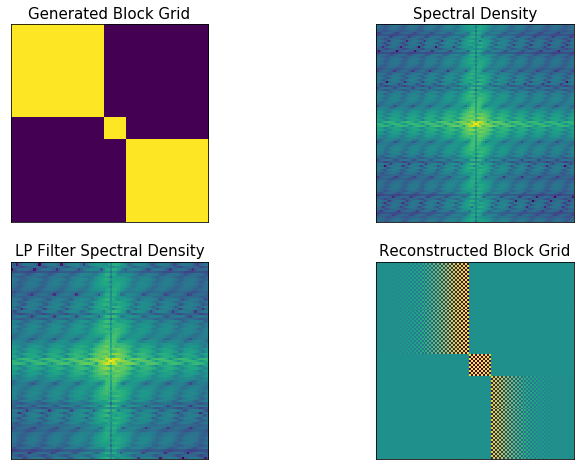

In [68]:
grid,l,gt = bg.generate_blockgrid(100,3,random=False,
                               bg_grid_noise=0.05,
                               label_noise=0.25)

fgrid = bg.grid_fft(grid)
sd_grid = bg.spec_density(fgrid)

lpg1 = bg.lp_filter(fgrid,10)
sd_lgrid = bg.spec_density(lpg1)

igrid = np.fft.ifft2(fgrid)
rigrid = np.real(igrid)

fig1, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(12,8))

axs = [ax1,ax2,ax3,ax4]
for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

    ax1.imshow(grid)
axs[0].set_title("Generated Block Grid",fontsize=15)

ax2.imshow(sd_grid)
axs[1].set_title("Spectral Density",fontsize=15)

ax3.imshow(sd_lgrid)
axs[2].set_title("LP Filter Spectral Density",fontsize=15)

ax4.imshow(rigrid)
axs[3].set_title("Reconstructed Block Grid",fontsize=15)